### INICIANDO O PROJETO

https://www.kaggle.com/rio2016/olympic-games baixei os CSVs para análise de dados.

#### Descrição dos CSVs:

Este conjunto de dados consiste nas estatísticas oficiais sobre os 11.538 atletas e 306 eventos nos Jogos Olímpicos de 2016 no Rio de Janeiro. O arquivo de atletas inclui o nome, nacionalidade (como código de país de três letras do COI), sexo, idade (como data de nascimento), altura em metros, peso em quilogramas, esporte e quantidade de medalhas de ouro, prata e / ou bronze. ganhou para todos os atletas olímpicos no Rio. O arquivo de eventos lista o nome, esporte, disciplina (se disponível), gênero dos competidores e local (is) para cada evento olímpico no Rio 2016.

#### Introdução: 

Encontrei um assunto interessante(Olimpiadas RIO 2016),nesse projeto irei utilizar alguns desses dados e comparar valores,etc


### Implementação do código

<i/> Importando a biblioteca Pandas,essa biblioteca permite uma análise de dados, e várias funções diferentes.
O método head() permite imprimir algumas linhas do CSV utilizado,utilizando o parâmetro o número de linhas,
por exemplo: dados.head(50),para ver até a linha 50.

In [37]:
import pandas

In [38]:
dados1 = pandas.read_csv('paises.csv')
dados1.head()

,country,code,population,gdp_per_capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [39]:
dados2 = pandas.read_csv('atletas.csv')
dados2.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [40]:
dados3 = pandas.read_csv('eventos.csv')
dados3.head()

,id,sport,discipline,name,sex,venues
0,701492,aquatics,backstroke,Women's 100m Backstroke,female,Olympic Aquatics Stadium
1,305278,aquatics,backstroke,Women's 200m Backstroke,female,Olympic Aquatics Stadium
2,708010,aquatics,backstroke,Men's 100m Backstroke,male,Olympic Aquatics Stadium
3,729643,aquatics,backstroke,Men's 200m Backstroke,male,Olympic Aquatics Stadium
4,567019,aquatics,breaststroke,Women's 100m Breaststroke,female,Olympic Aquatics Stadium


<i/> Criando listas,transformando as colunas country,population,sex,nationality e height em listas,para podemos manipular melhor os dados.

In [41]:
lista_paises = list(dados1['country'])
lista_codigos = list(dados1['population'])
lista_sexo = list(dados3['sex'])
lista_nacionalidade = list(dados2['nationality'])
lista_altura = list(dados2['height'])

<i/> O código abaixo tem como função descobrir qual país que participou das olímpiadas tem maior população,compara todos os elementos da lista,recebendo o maior elemento,utilizando a coluna(population) do dado1:

In [42]:
maior = lista_codigos[0]
menor = lista_codigos[0]
pais = 0

for x in range(len(lista_codigos)):
    if lista_codigos[x] > maior:
        maior = lista_codigos[x]
        pais = x
    if lista_codigos[x] < menor:
        menor = lista_codigos[x]

print('MAIOR POPULAÇÃO:',lista_paises[pais],'-',maior)

MAIOR POPULAÇÃO: China - 1371220000.0


No código abaixo analisa quantos atletas masculinos e femininos participaram da competição,utilizando a coluna(sex) do dado3:

In [43]:
feminino = 0
masculino = 0
invalido = 0
for x in range(len(lista_sexo)):
    if lista_sexo[x] == 'female':
        feminino = feminino + 1
    elif lista_sexo[x] == 'male':
        masculino = masculino + 1
    else:
        invalido += 1
print('SEXO F: %s'%(feminino),'SEXO M: %s'%(masculino))

SEXO F: 136 SEXO M: 161


<i/> No código abaixo foram criadas duas listas para armazenar os elementos, o código compara a população dos paises,se for maior que 100 milhões o elemento é armazenado para utilizamos no gráfico,logo abaixo:

In [44]:
lista_maiores = []
lista_paisesM = []
for x in range(len(lista_codigos)):
    if lista_codigos[x] >= 100000000:
        lista_maiores.append(lista_codigos[x])
        lista_paisesM.append(lista_paises[x])


 <i/> Importando matplotlib,para montar o gráfico,utilizaremos o elementos armazenados a cima como paramêtro: 

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
index = np.arange(len(lista_paisesM))

<i/> Criando uma função para plotar o gráfico de barras:

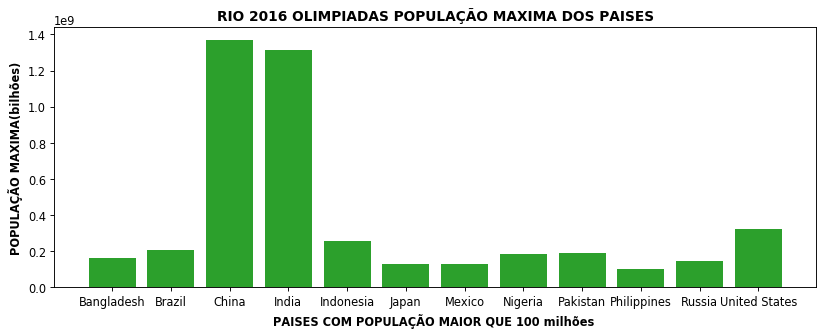

In [46]:
def plot_bar_x():
    # Código para apresentar o gráfico
    figure(num=1, figsize=(12, 4.2), dpi=82, facecolor='w', edgecolor='k')
    plt.bar(index, lista_maiores, color = 'C2')
    plt.xlabel('PAISES COM POPULAÇÃO MAIOR QUE 100 milhões ', fontsize=10, fontweight='bold')
    plt.ylabel('POPULAÇÃO MAXIMA(bilhões)', fontsize=10, fontweight='bold')
    plt.xticks(index, lista_paisesM, fontsize=10, rotation=0)
    plt.title('RIO 2016 OLIMPIADAS POPULAÇÃO MAXIMA DOS PAISES', fontweight='bold')
    plt.show()
return plot_bar_x()

<i/> Agora vamos comparar os elementos da lista_nacionalidade(coluna "nationality"),se o atleta for do Brasil ou dos Estados Unidos,as variaveis recebe mais um,assim saberemos quantos atletas de cada pais mencionado participaram da competição:

In [47]:
atleta_eua = 0
atleta_brasil = 0
for x in range(len(lista_nacionalidade)):
    if lista_nacionalidade[x] == "USA":
        atleta_eua = atleta_eua + 1
    elif lista_nacionalidade[x] == "BRA":
        atleta_brasil = atleta_brasil + 1
print('ATLETAS EUA: %s'%(atleta_eua),'--','ATLETAS BRASIL: %s'%(atleta_brasil))

ATLETAS EUA: 567 -- ATLETAS BRASIL: 485


<i/>Criei 3 listas para análisar quais atletas brasileiros ganharam medalha de ouro nas olimpiadas:

In [48]:
lista_ouro = list(dados2['gold'])
lista_atletas = list(dados2['name'])
lista_atletasO = []

<i/> Assim iremos usar a lista_nacionalidade que criamos no começo do projeto,a lista_atletaO só vai pegar atletas do Brasil.

In [51]:
for x in range(len(lista_ouro)):
    if lista_ouro[x] == 1:
        if lista_nacionalidade[x] == 'BRA':
            lista_atletasO.append(lista_atletas[x])
print('ATLETAS BRASILEIROS QUE GANHARAM MEDALHA DE OURO: %s'%(lista_atletasO))

ATLETAS BRASILEIROS QUE GANHARAM MEDALHA DE OURO: ['Alison Cerutti', 'Bruno Mossa Rezende', 'Bruno Oscar Schmidt', 'Douglas Correia de Souza', 'Douglas Santos', 'Eder Carbonera', 'Evandro M. Guerra', 'Felipe Anderson', 'Gabriel Barbosa', 'Gabriel Jesus', 'Kahena Kunze', 'Luan', 'Luan Garcia', 'Lucas Saatkamp', 'Luiz Felipe Marques Fonteles', 'Marquinhos', 'Martine Grael', 'Mauricio Borges Almeida Silva', 'Mauricio Luiz de Souza', 'Neymar', 'Rafael Alcantara', 'Rafaela Silva', 'Renato Augusto', 'Ricardo Lucarelli', 'Robson Conceicao', 'Rodrigo Caio', 'Rodrigo Dourado', 'Sergio Dutra Santos', 'Thiago Braz da Silva', 'Thiago Maia', 'Uilson', 'Walace', 'Wallace de Souza', 'Weverton', 'William', 'William Arjona', 'Zeca', 'Alison Cerutti', 'Bruno Mossa Rezende', 'Bruno Oscar Schmidt', 'Douglas Correia de Souza', 'Douglas Santos', 'Eder Carbonera', 'Evandro M. Guerra', 'Felipe Anderson', 'Gabriel Barbosa', 'Gabriel Jesus', 'Kahena Kunze', 'Luan', 'Luan Garcia', 'Lucas Saatkamp', 'Luiz Felipe 